# Session 13: Simulation Modeling II (with Solutions)

In this session, we analyze a simulation case that puts everything we learned in the course so far together, including probability, algorithmic thinking and Python programming.

# Case 10: Pricing Two Substitutable Products by Simulation

## Part I: Simulating Customer Valuations

A firm sells two styles of headphones, which we refer to as model 0 and model 1. Based on a clustering analysis using historic data, the firm estimates that customers will come from three segments (A, B or C), and the valuation (maximum willingness to pay) of customers for the two products can be modelled as normally distributed according to the following parameters. 

|Segment | $\mu_0$ | $\sigma_0$ | $\mu_1$ | $\sigma_1$ | Proportion |
|--|--|--|--|--|--|
|A | 30 | 30 | 70 | 30 | 0.1 |
|B | 80 | 20 | 20 | 10 | 0.3 |
|C | -10 | 20 | -10 | 20 |0.6 |

As in the above table, a randomly chosen customer will be from segment A with 10\% probability, segment B with 30\% probability and segment C with 60\% probability. Segment A customers have high valuations for model 1, while segment B customers have high valuations for model 0. Segment C customers, which make up the majority, do not on average value either products. 

**Generate a pandas DataFrame called "values" representing the simulated valuations of 10,000 randomly chosen customers. Each row represents a customer. There are three columns:**

- **segment**: The segment of the customer, being "A", "B" or "C".
- **product_0**: The customer's maximum willingness to pay for Model 0.
- **product_1**: The customer's maximum willingness to pay for Model 1.

In [2]:
import pandas as pd
from scipy.stats import norm
import numpy as np
np.random.seed(0)
data=[]
dist0={'A':norm(30,30),'B':norm(80,20),'C':norm(-10,20)}
dist1={'A':norm(70,30),'B':norm(20,10),'C':norm(-10,20)}
for i in range(10000):
    segment=np.random.choice(['A','B','C'],p=[.1,.3,.6])
    data.append([segment,dist0[segment].rvs(),dist1[segment].rvs()])
values=pd.DataFrame(data,columns=['segment','product_0','product_1'])

Once you have completed this part, you should be able to run the following code and obtain similar outputs.

In [3]:
values.head()

,segment,product_0,product_1
0,C,4.831835,21.058274
1,C,27.351160,-29.545558
2,C,15.322371,-20.117531
3,C,5.220755,-7.566500
4,A,44.529365,87.374214


In [4]:
values.plot(x='product_0',y='product_1',kind='scatter',figsize=(8,8))

## Part II: Analysis and Optimization

The following code is a modification of the solution to case 9, using Pandas vectorized functions instead of for loops for improved performance.

In [12]:
import numpy as np
def demand(df,priceVector):
    diff=df[['product_0','product_1']]-priceVector
    demand0=((diff['product_0']>=diff['product_1'])&(diff['product_0']>=0)).sum()
    demand1=((diff['product_0']<diff['product_1'])&(diff['product_1']>=0)).sum()    
    return demand0,demand1
demand(values,[30,50])

(3314, 652)

- test

In [9]:
diff=values[['product_0','product_1']].head(10)-[30,50]
diff

,product_0,product_1
0,-25.168165,-28.941726
1,-2.648840,-79.545558
2,-14.677629,-70.117531
3,-24.779245,-57.566500
4,14.529365,37.374214
5,-10.118419,-64.103165
6,30.784908,-26.230730
7,-91.059796,-46.927628
8,45.157010,-14.856087
9,-39.084830,-63.743677


In [8]:
diff=values['product_0','product_1'].head(10)
diff

KeyError: ('product_0', 'product_1')

**Write a function called "tabluate" which takes as input a DataFrame in the format of the "values" DataFrame from Part I and outputs a DataFrame with the following columns:**

- **Price_0**: The price for Model 0.
- **Price_1**: The price for Model 1.
- **Demand_0**: The simulated demand for Model 0 under the above prices.
- **Demand_1**: The simulated demand for Model 1 under the above prices.
- **Revenue**: The total revenue from the two products.

The rows of the DataFrame corresponds to every combination of Price_0 and Price_1 with values from `range(0,200,5)`, which is equivalent to the list `[0,5,10,...,195]`.

In [13]:
def tabulate(values):
    output=[]
    for p0 in range(0,200,5):
        for p1 in range(0,200,5):
            d0,d1=demand(values,[p0,p1])
            revenue=p0*d0+p1*d1
            output.append([p0,p1,d0,d1,revenue])
    result=pd.DataFrame(output,columns=['Price_0','Price_1','Demand_0','Demand_1','Revenue'])
    return result

In [14]:
result=tabulate(values)
result.shape

(1600, 5)

In [16]:
result.head()

,Price_0,Price_1,Demand_0,Demand_1,Revenue
0,0,0,4622,2431,0
1,0,5,4744,1996,9980
2,0,10,4838,1605,16050
3,0,15,4925,1284,19260
4,0,20,4989,1049,20980


Using the "result" DataFrame, you can obtain the best revenue found using a number of ways, as below.

In [8]:
result['Revenue'].max()

194215

In [9]:
result['Revenue'].idxmax()

491

In [10]:
result.iloc[491,:]

Price_0         60
Price_1         55
Demand_0      2587
Demand_1       709
Revenue     194215
Name: 491, dtype: int64

In [11]:
result.sort_values(by='Revenue',ascending=False).head(1)

,Price_0,Price_1,Demand_0,Demand_1,Revenue
491,60,55,2587,709,194215


## Part III: Obtaining Additional Insights

### A. Value of price discrimination

**Suppose that the company can observe which segment each customer belongs to, and charge separate prices to each segment. What would be the optimal prices for each segment and what would be the additional revenue from this flexibility?** 

(**Hint:** Filter the "values" DataFrame by whether the segment is A, B or C, and use the tabulate function to obtain DataFrames "resultA", "resultB", "resultC", which are analogous to the "result" DataFrame from above but are computed using valuations from one segment at a time.)

In [12]:
resultA=tabulate(values.query('segment=="A"'))
resultB=tabulate(values.query('segment=="B"'))
resultC=tabulate(values.query('segment=="C"'))

In [13]:
resultA.sort_values(by='Revenue',ascending=False).head(1)

,Price_0,Price_1,Demand_0,Demand_1,Revenue
451,55,55,103,692,43725


In [14]:
resultB.sort_values(by='Revenue',ascending=False).head(1)

,Price_0,Price_1,Demand_0,Demand_1,Revenue
486,60,30,2465,98,150840


In [15]:
resultC.sort_values(by='Revenue',ascending=False).head(1)

,Price_0,Price_1,Demand_0,Demand_1,Revenue
123,15,15,580,603,17745


In [16]:
benefit=resultA['Revenue'].max()+resultB['Revenue'].max()+resultC['Revenue'].max()-\
    result['Revenue'].max()
print(f'Potential benefit of price differentiation is about ${benefit}.')

Potential benefit of price differentiation is about $18095.


### B. Fixed Prices for One Product

**Suppose that the price for Model 0 is fixed and the firm can only alter the price for Model 1, plot the total Revenue as a function of the price for Model 1, when the price for Model 0 is 10, 60, 110, and 160.** (Note: you do not have to plot them on the same figure as below.)

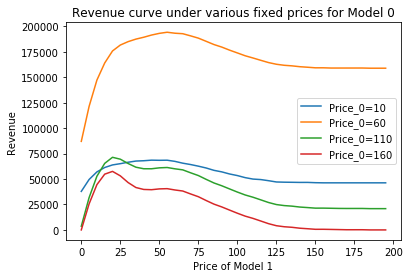

In [17]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
result.query('Price_0==10').plot(ax=ax,x='Price_1',y='Revenue',label='Price_0=10')
result.query('Price_0==60').plot(ax=ax,x='Price_1',y='Revenue',label='Price_0=60')
result.query('Price_0==110').plot(ax=ax,x='Price_1',y='Revenue',label='Price_0=110')
result.query('Price_0==160').plot(ax=ax,x='Price_1',y='Revenue',label='Price_0=160')
plt.title('Revenue curve under various fixed prices for Model 0')
plt.ylabel('Revenue')
plt.xlabel('Price of Model 1')
plt.legend()
plt.show()

An alternative analysis based on more advanced Pandas functionality is as follows.

- test

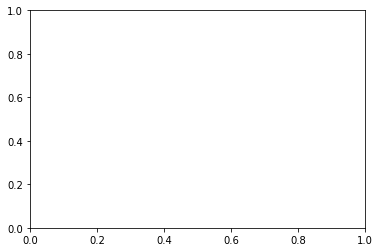

In [20]:
fig,ax=plt.subplots()
ax

In [18]:
def bestPrice1(df):
    return df.sort_values(by='Revenue',ascending=False)['Price_1'].iloc[0]
optPrice1=result.groupby('Price_0').apply(bestPrice1)
optPrice1.head()

Price_0
0     45
5     50
10    45
15    50
20    55
dtype: int64

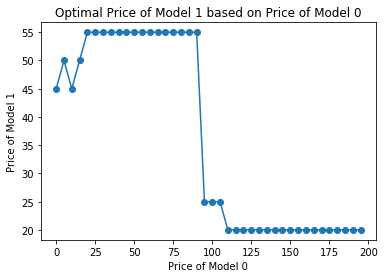

In [19]:
import matplotlib.pyplot as plt
optPrice1.plot(marker='o')
plt.xlabel('Price of Model 0')
plt.ylabel('Price of Model 1')
plt.title('Optimal Price of Model 1 based on Price of Model 0')
plt.show()

### (Optional) C. Competitive Pricing

**Suppose now that Model 0 is sold by a competitor, and only revenue from Model 1 counts. Modify the above code to display the optimal price for Model 1 given the competitor's pricing for Model 0. Moreover, plot the optimal attainable revenue given the competitor's pricing.** 

(**Hint**: You can create a new column in the "result" DataFrame corresponding to the revenue for Model 1 only, and sort by that revenue instead of by total revenue in the above code.)

In [20]:
result['Revenue_1']=result['Price_1']*result['Demand_1']
def bestResponse(df):
    return df.sort_values(by='Revenue_1',ascending=False)['Price_1'].iloc[0]
optResponse=result.groupby('Price_0').apply(bestResponse)
optResponse.head()

Price_0
0     45
5     35
10    35
15    45
20    45
dtype: int64

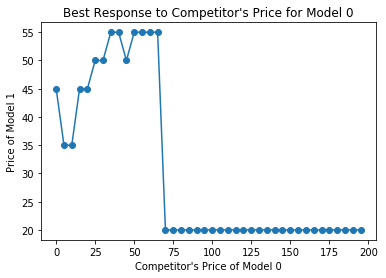

In [21]:
import matplotlib.pyplot as plt
optResponse.plot(marker='o')
plt.xlabel("Competitor's Price of Model 0")
plt.ylabel('Price of Model 1')
plt.title("Best Response to Competitor's Price for Model 0")
plt.show()

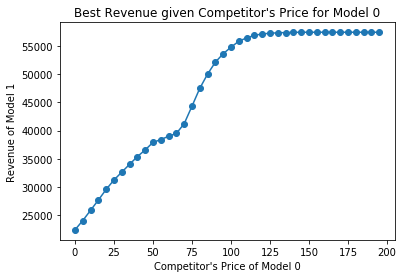

In [22]:
def bestRevenue(df):
    return df.sort_values(by='Revenue_1',ascending=False)['Revenue_1'].iloc[0]
optRev1=result.groupby('Price_0').apply(bestRevenue)
optRev1.head()
optRev1.plot(marker='o')
plt.xlabel("Competitor's Price of Model 0")
plt.ylabel('Revenue of Model 1')
plt.title("Best Revenue given Competitor's Price for Model 0")
plt.show()